

# Dummy Marketing and Sales Data

https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

https://www.kaggle.com/code/pruthvikmachhi/sales-prediction-project-deployment

https://www.kaggle.com/code/damanjeetkaur/marketing-sales-data-evaluate-linear-regression


https://support.google.com/analytics/answer/6015070?hl=pt-BR#zippy=%2Cneste-artigo
https://support.google.com/analytics/answer/1033863#zippy=%2Cneste-artigo

https://ga-dev-tools.google/campaign-url-builder/


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Step 1 and step 2: Imports and Data exploration

In [2]:
data = pd.read_csv('Dummy Data HSS.xls', sep=',')

In [3]:
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
media_geral = data.groupby('Influencer').agg({'TV': 'mean', 'Radio': 'mean', 'Social Media': 'mean', 'Sales': 'mean'})



The features in the data are:

    TV promotion budget (in millions of dollars)
    Social media promotion budget (in millions of dollars)
    Radio promotion budget (in millions of dollars)
    Sales (in millions of dollars)


In [5]:

media_geral = media_geral.reset_index()

display(media_geral)

,Influencer,TV,Radio,Social Media,Sales
0,Macro,55.047449,18.321927,3.369172,195.613601
1,Mega,53.500000,18.076145,3.373669,190.593666
2,Micro,53.847958,18.230631,3.273273,191.809095
3,Nano,53.901582,18.015812,3.280347,191.934304


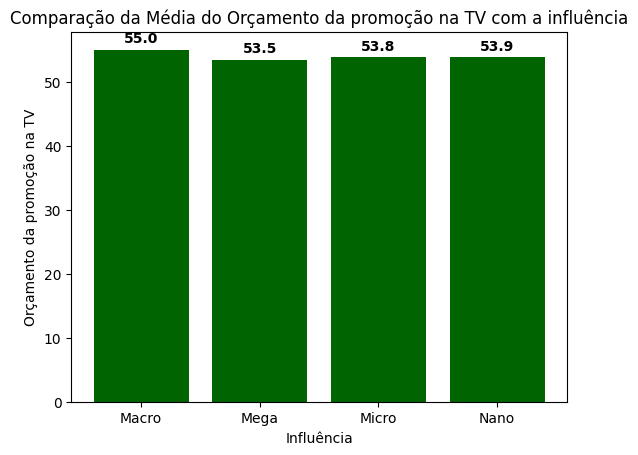

In [6]:
#variavel que armazena
barras = plt.bar(media_geral['Influencer'], media_geral['TV'], color='darkgreen')
#labels=rotulo
#espaçamento é padding
plt.bar_label(barras, labels=media_geral['TV'].round(1), padding=3, fontsize=10, fontweight='bold')

plt.xlabel('Influência')
plt.ylabel('Orçamento da promoção na TV')
plt.title('Comparação da Média do Orçamento da promoção na TV com a influência')
#plt.grid(True)
plt.show()

In [7]:
# Display the shape of the data.
data.shape

(4572, 5)



There are three continuous independent variables: TV, Radio, and Social_Media. To understand how heavily the business invests in each promotion type, use describe() to generate descriptive statistics for these three variables.


In [8]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


Handling missing Duplicated data


In [10]:
data.isnull().sum()


TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [11]:
data.duplicated().sum()


0

In [12]:
#tenho que deletar os dados nulos 
data = data.dropna()
#Drop rows with any missing values (default behavior):

In [13]:
data.isnull().sum()


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [14]:
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


# Statastical Summary


In [15]:
numerical_summary = data.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
TV,4546.000000,54.062912,26.104942,10.000000,32.000000,53.000000,77.000000,100.000000
Radio,4546.000000,18.157533,9.663260,0.000684,10.555355,17.859513,25.640603,48.871161
Social Media,4546.000000,3.323473,2.211254,0.000031,1.530822,3.055565,4.804919,13.981662
Sales,4546.000000,192.413332,93.019873,31.199409,112.434612,188.963678,272.324236,364.079751


# EDA & Data visualization


## Pairwise correlation heatmap¶


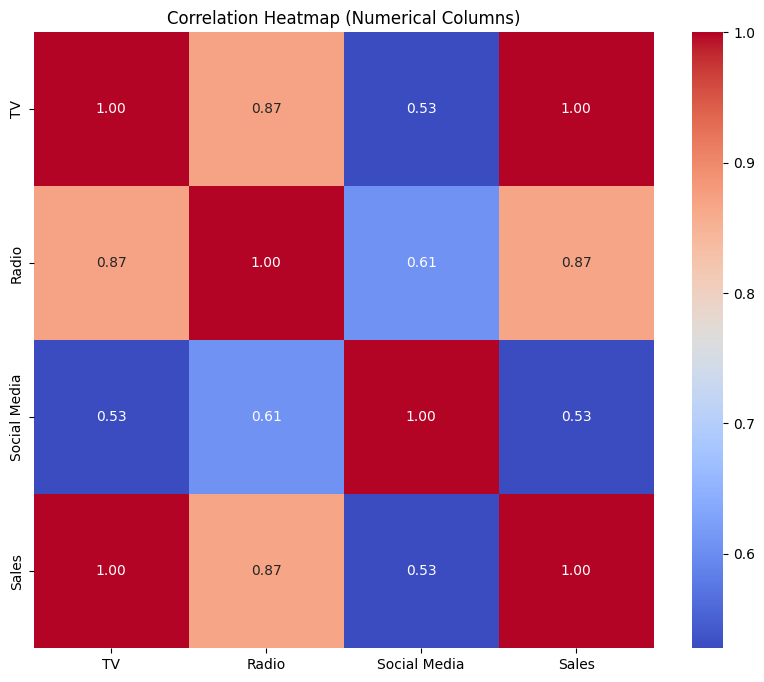

In [16]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_df = data[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

In [17]:
numerical_columns

Index(['TV', 'Radio', 'Social Media', 'Sales'], dtype='object')

In [18]:
import numpy as np


/tmp/ipykernel_11646/2452702204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+'_log'] = np.log1p(data[column])


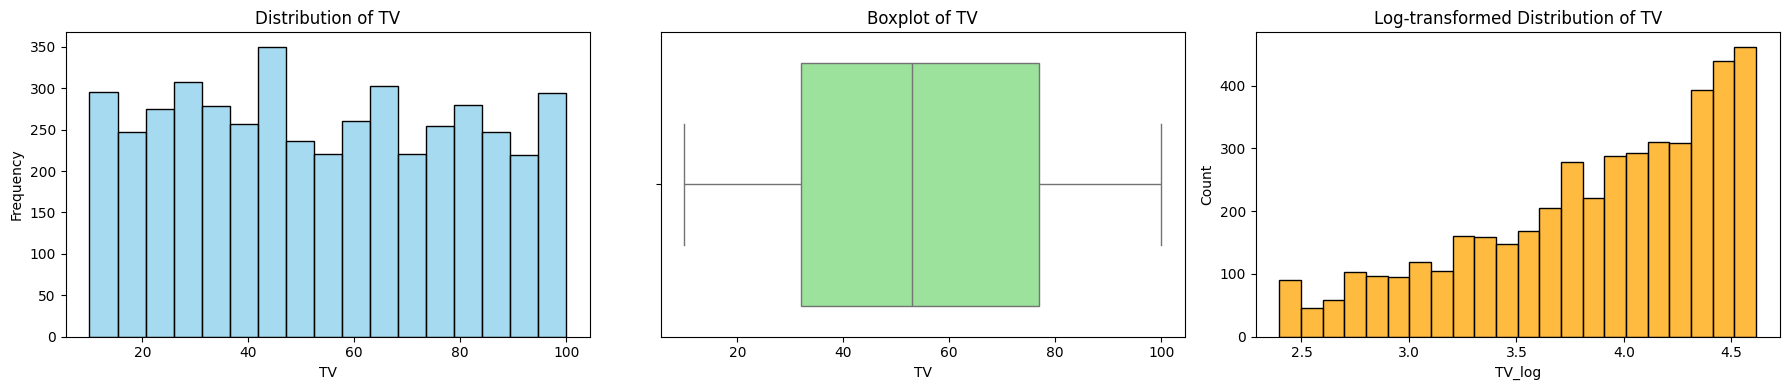

/tmp/ipykernel_11646/2452702204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+'_log'] = np.log1p(data[column])


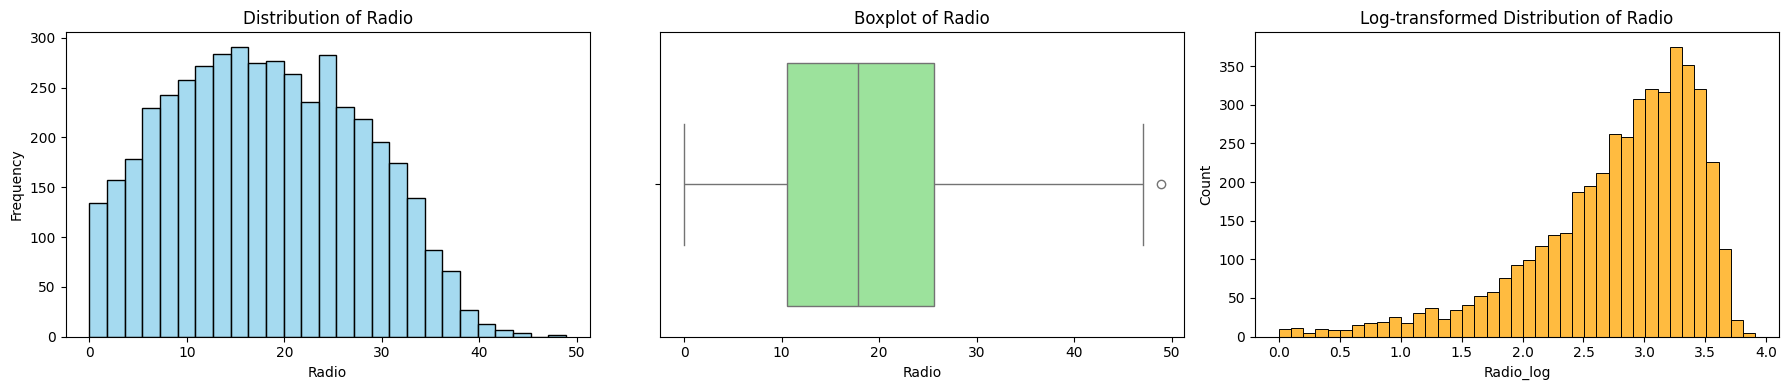

/tmp/ipykernel_11646/2452702204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+'_log'] = np.log1p(data[column])


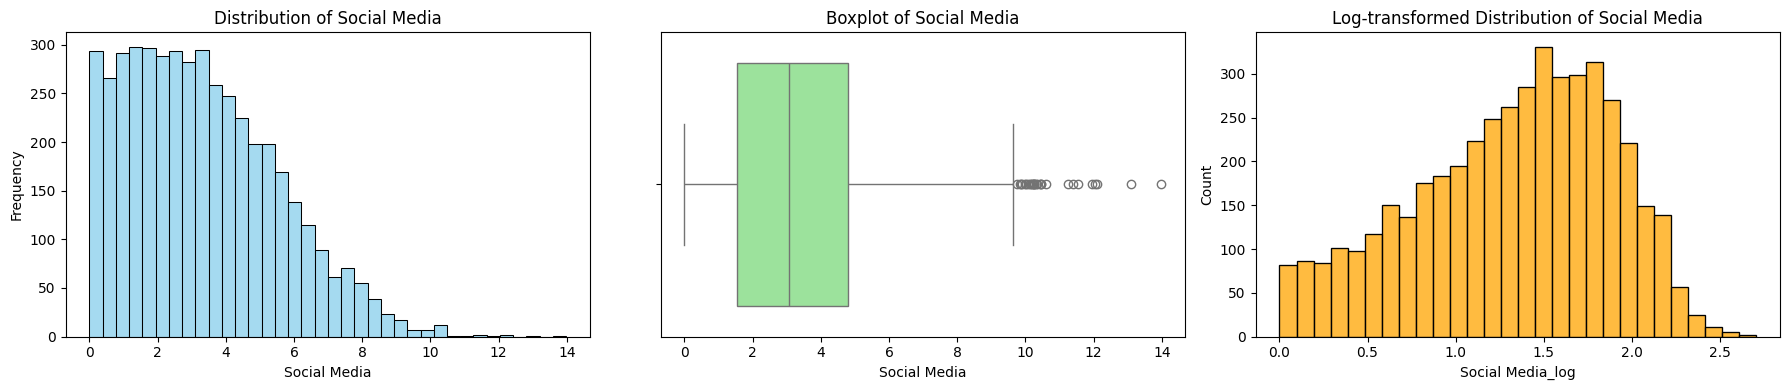

/tmp/ipykernel_11646/2452702204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+'_log'] = np.log1p(data[column])


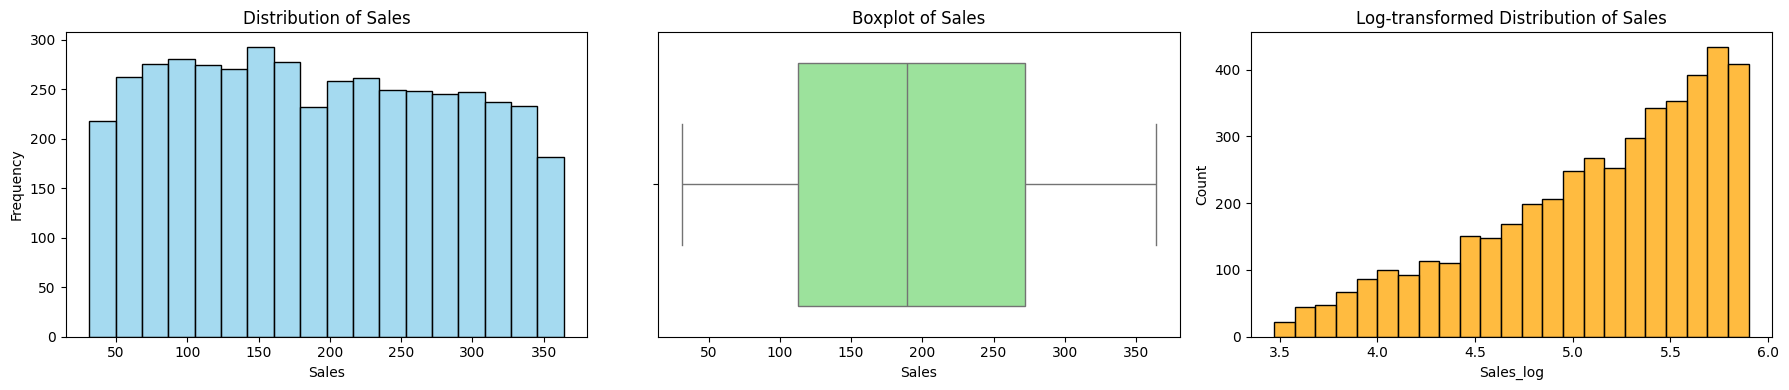

In [19]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(data[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=data[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if data[column].skew() > -1:
        data[column+'_log'] = np.log1p(data[column])
        sns.histplot(data[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

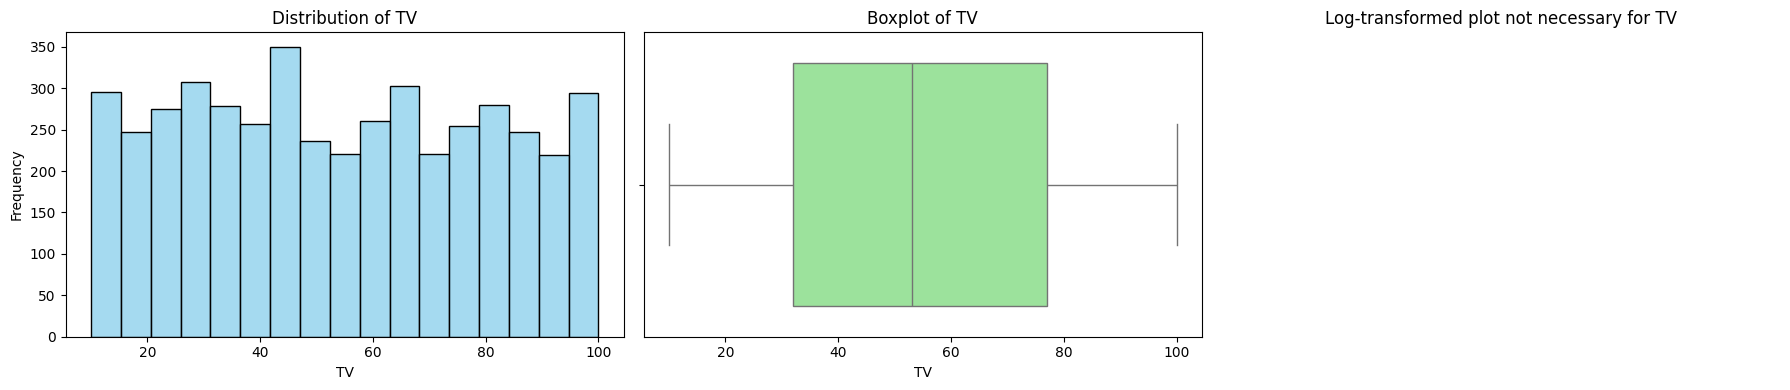

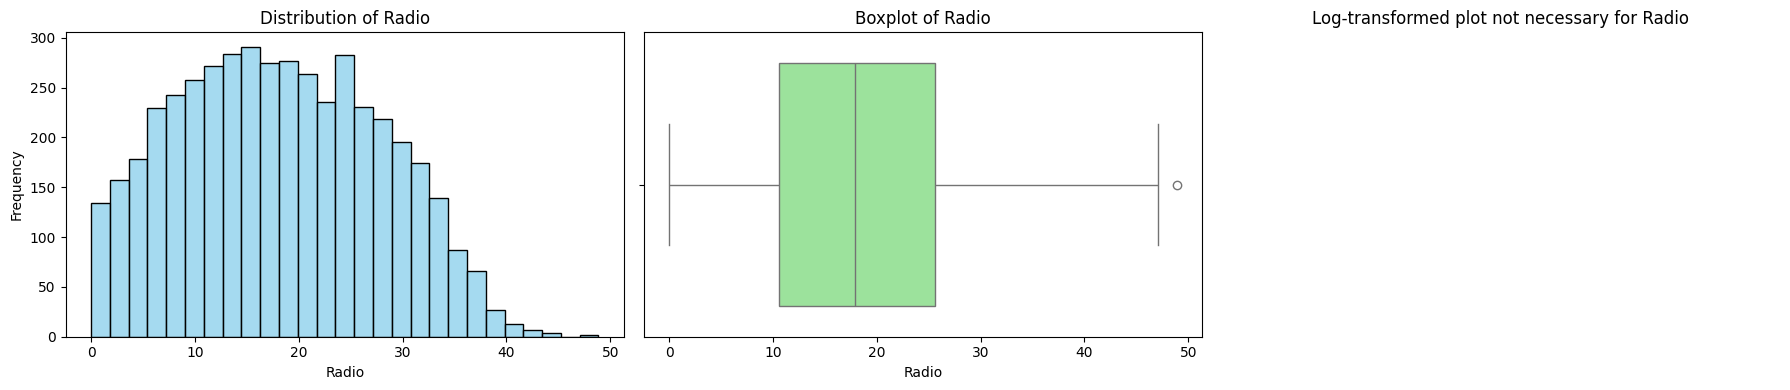

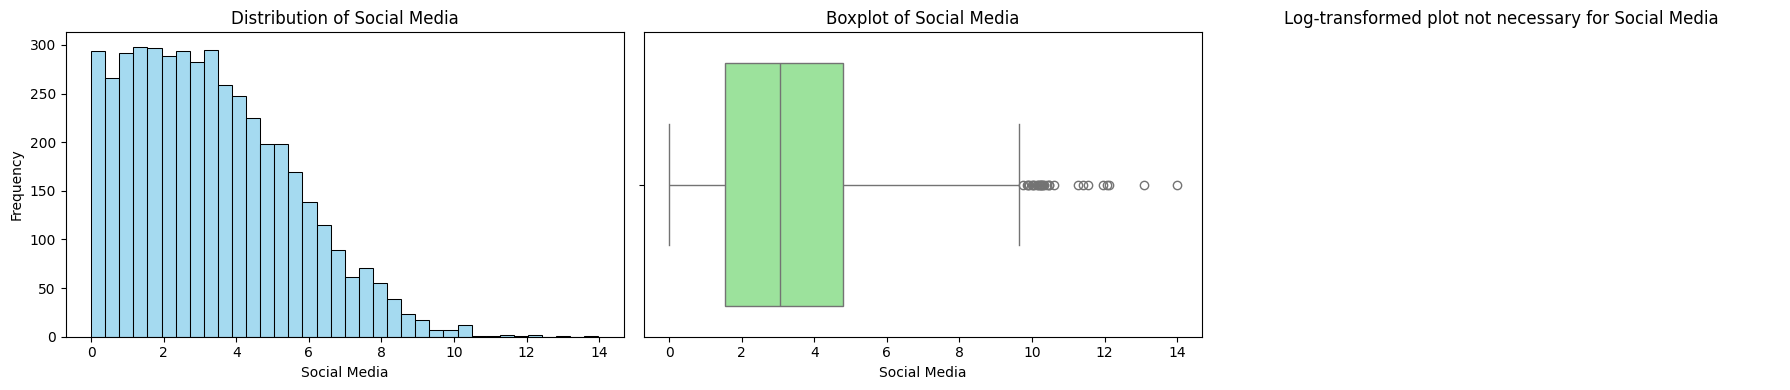

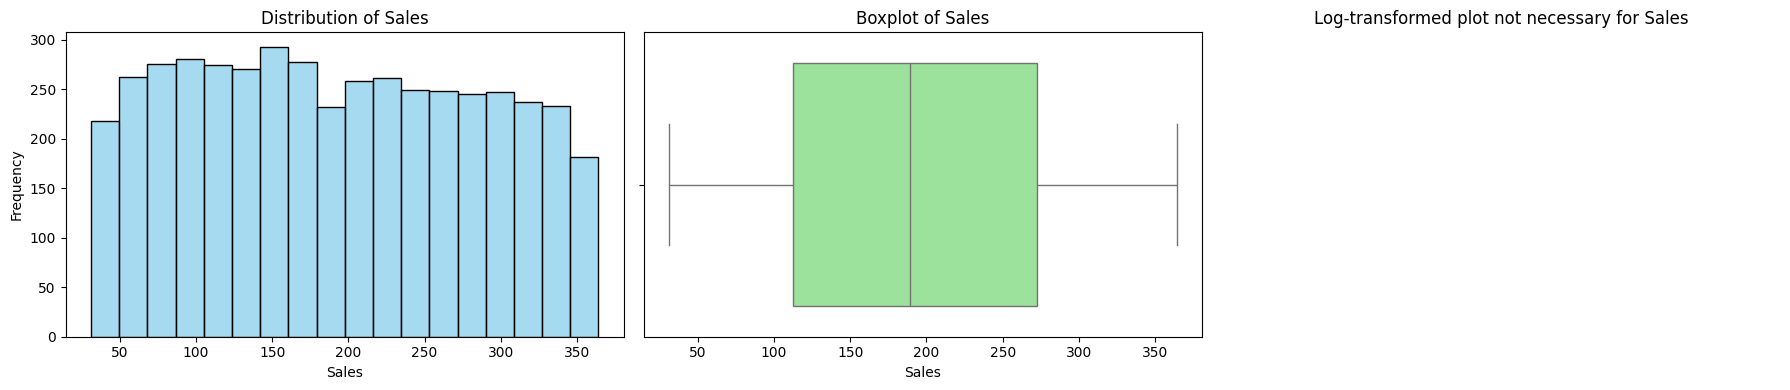

In [20]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(data[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=data[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if data[column].skew() > 1:
        data[column+'_log'] = np.log1p(data[column])
        sns.histplot(data[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

# scatter and pair plots


In [21]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()


def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()






In [22]:
numerical_columns

Index(['TV', 'Radio', 'Social Media', 'Sales'], dtype='object')

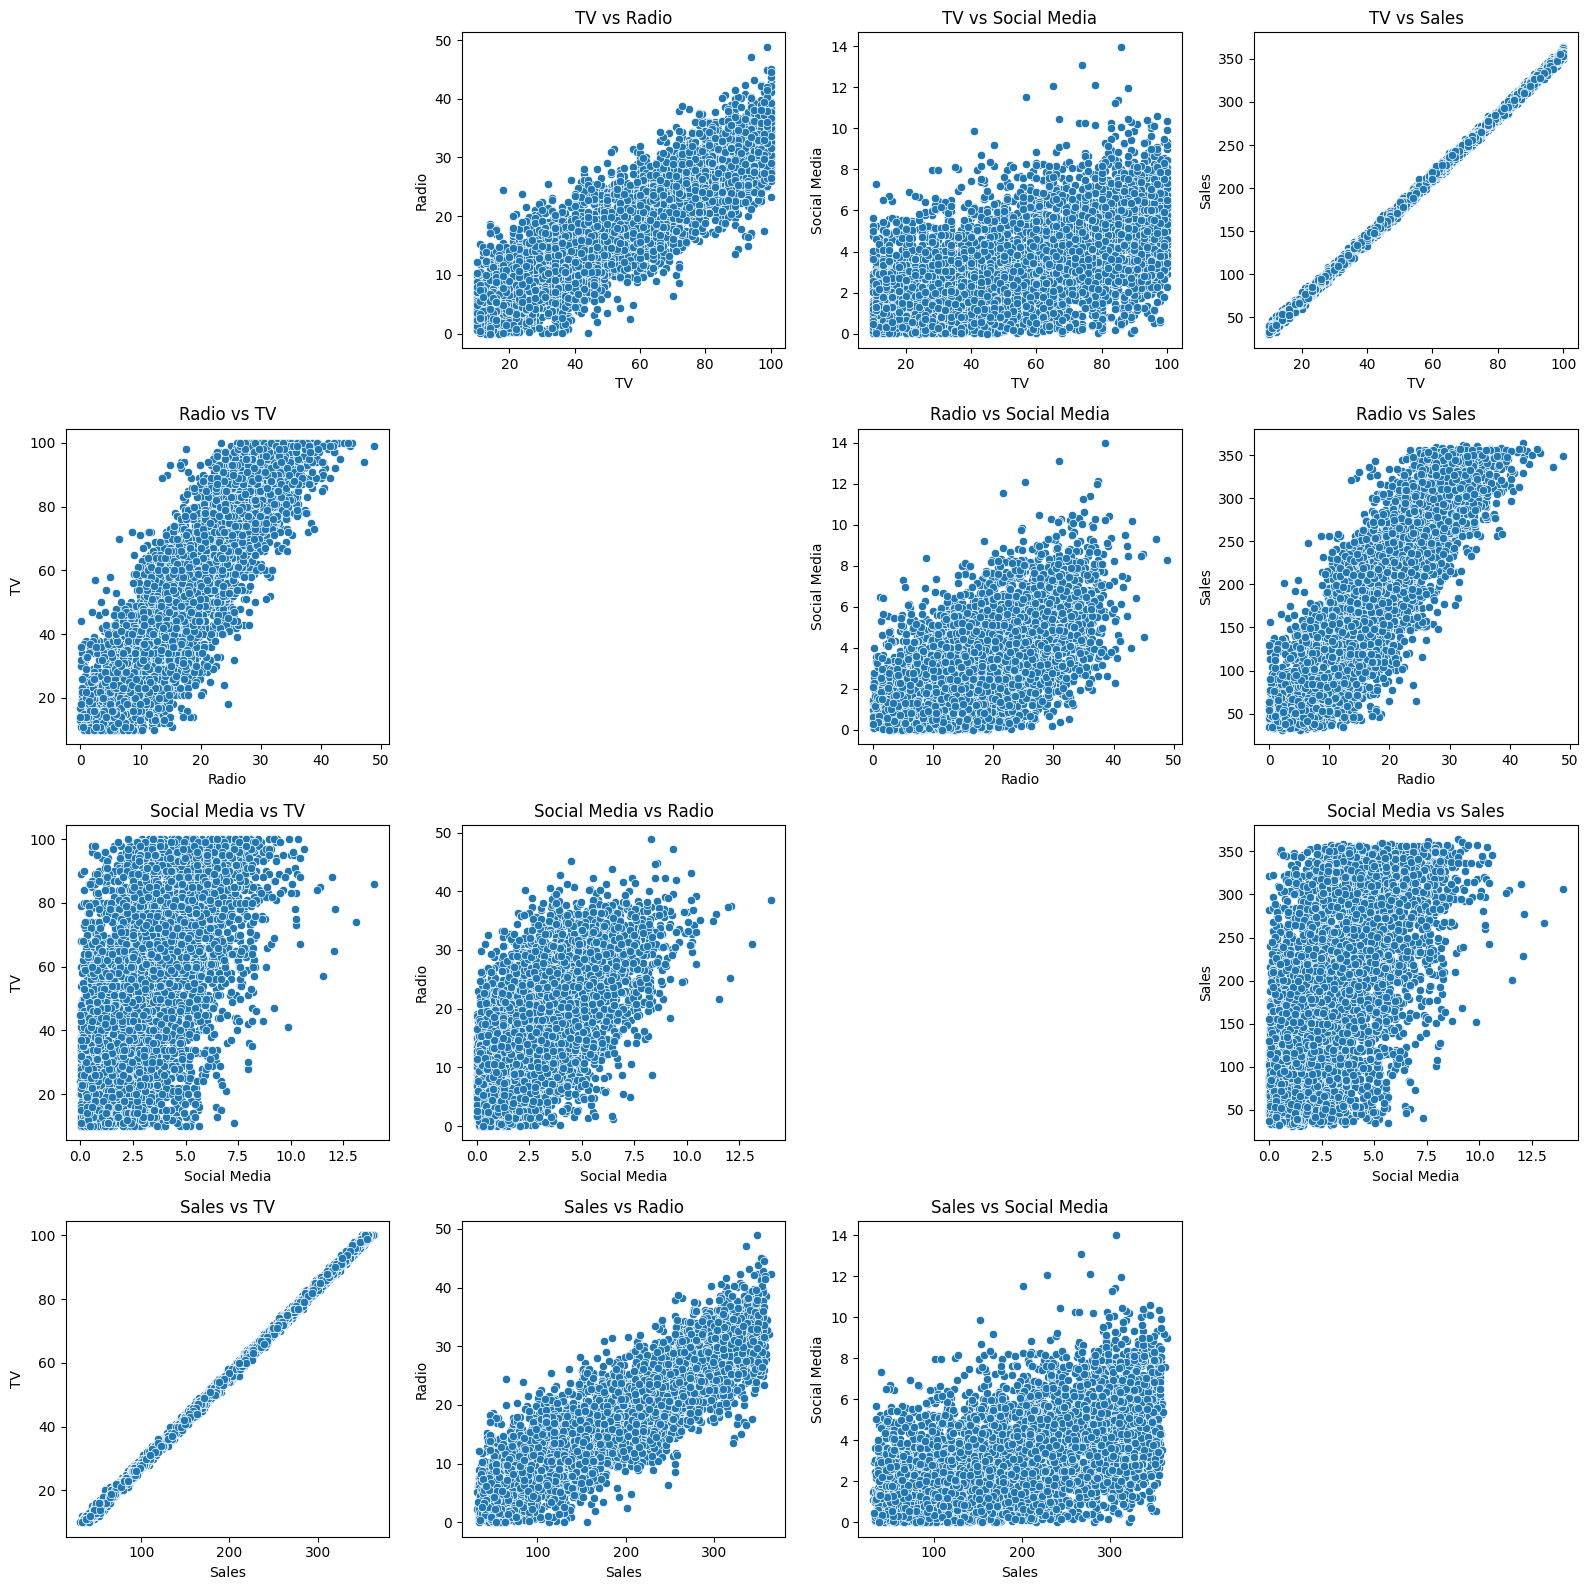

In [23]:
scatter_plots(data, numerical_columns)


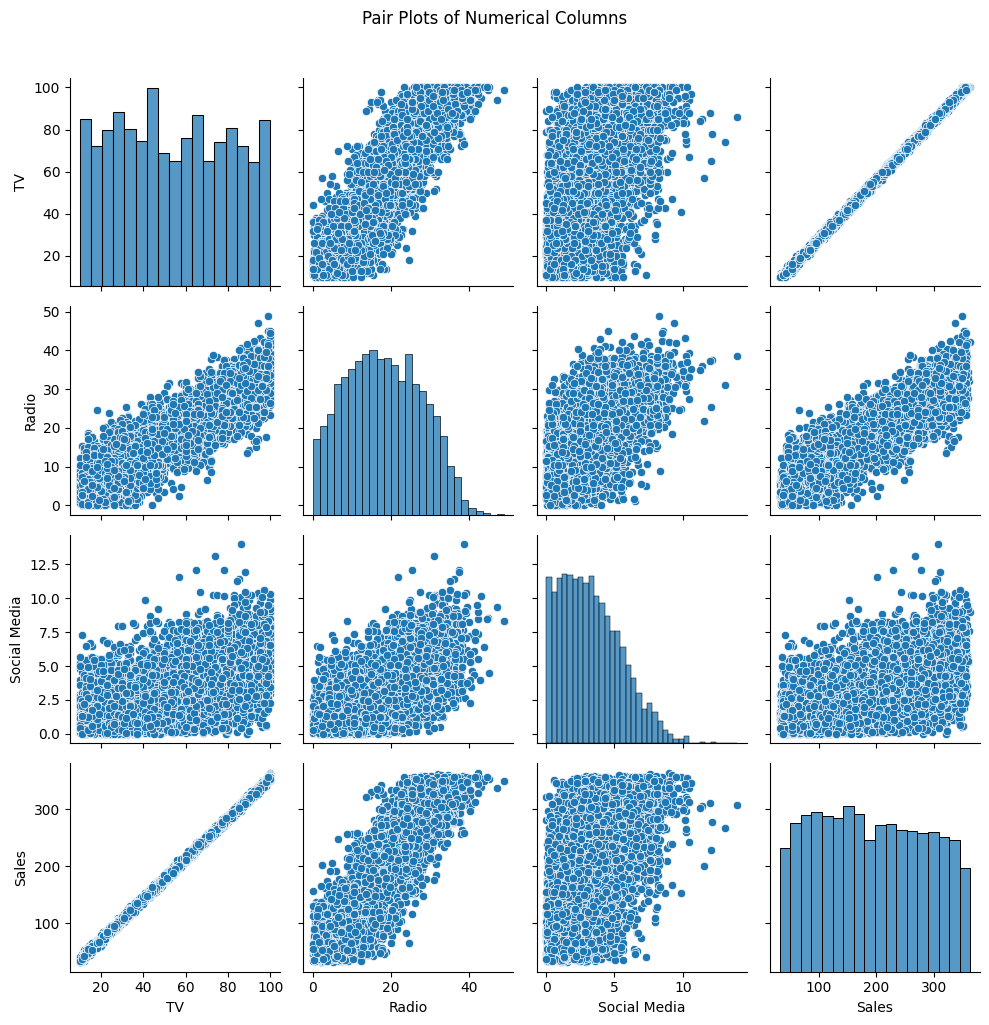

In [24]:
pair_plots(data, numerical_columns)

In [25]:
data.shape

(4546, 9)

In [26]:
data.head()

,TV,Radio,Social Media,Influencer,Sales,TV_log,Radio_log,Social Media_log,Sales_log
0,16.0,6.566231,2.907983,Mega,54.732757,2.833213,2.023695,1.363021,4.020568
1,13.0,9.237765,2.409567,Mega,46.677897,2.639057,2.326083,1.226585,3.864468
2,41.0,15.886446,2.913410,Mega,150.177829,3.737670,2.826511,1.364409,5.018457
3,83.0,30.020028,6.922304,Mega,298.246340,4.430817,3.434633,2.069682,5.701267
4,15.0,8.437408,1.405998,Micro,56.594181,2.772589,2.244681,0.877965,4.053422


In [27]:
drop_col=['Influencer', 'TV_log', 'Radio_log', 'Social Media_log', 'Sales_log']

data.drop(drop_col,inplace=True,axis=1)


/tmp/ipykernel_11646/3893172515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(drop_col,inplace=True,axis=1)


In [28]:
df1 = data

In [29]:
df1

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [30]:
df1 = df1.head(200)
#exemplo ou amosta de 200 dados

In [31]:
df1.shape

(200, 4)

In [32]:
y=df1['Sales']

In [33]:
x = df1.drop(['Sales'],axis=1)


In [34]:
x

,TV,Radio,Social Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998
...,...,...,...
217,73.0,28.464598,5.545684
218,78.0,26.394070,3.837370
219,59.0,25.687287,6.903109
220,44.0,15.726340,5.470317


In [35]:
print(df1.columns)


Index(['TV', 'Radio', 'Social Media', 'Sales'], dtype='object')


In [36]:
import pandas as pd

# Feature Scaling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV

In [38]:
# correto 
#!pip install scikit-learn
#nao o que esta abaixo
#!pip install sklearn


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

In [40]:
df1


array([[6.66666667e-02, 1.35208121e-01, 2.90646402e-01, 6.82958032e-02],
       [3.33333333e-02, 1.92182650e-01, 2.40776397e-01, 4.34778464e-02],
       [3.44444444e-01, 3.33975913e-01, 2.91189452e-01, 3.62373120e-01],
       [8.11111111e-01, 6.35396093e-01, 6.92307651e-01, 8.18589346e-01],
       [5.55555556e-02, 1.75113819e-01, 1.40362210e-01, 7.40310650e-02],
       [2.11111111e-01, 2.00214591e-01, 1.02457120e-01, 2.25914565e-01],
       [5.00000000e-01, 5.26071708e-01, 4.27286287e-01, 5.11813385e-01],
       [2.33333333e-01, 3.65295957e-01, 2.28798336e-01, 2.34679675e-01],
       [7.33333333e-01, 5.20848560e-01, 7.13100713e-01, 7.32142666e-01],
       [3.33333333e-02, 4.36770050e-03, 2.22751696e-01, 4.84159052e-02],
       [5.77777778e-01, 5.14371493e-01, 5.15124497e-01, 5.92788788e-01],
       [3.55555556e-01, 3.32288802e-01, 3.19356967e-01, 3.48095731e-01],
       [6.00000000e-01, 4.26831127e-01, 3.92020752e-01, 6.07181794e-01],
       [2.66666667e-01, 0.00000000e+00, 2.37088135e

# Splitting data


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
X_train


,TV,Radio,Social Media
83,36.0,9.096780,3.818834
219,59.0,25.687287,6.903109
40,43.0,12.842128,2.593697
25,54.0,27.807614,4.060782
128,30.0,4.561312,1.652760
...,...,...,...
111,30.0,17.469019,4.337634
15,36.0,3.900196,0.060402
96,20.0,3.934783,0.328470
193,26.0,15.266733,2.205880


In [43]:
y_train



83     127.092674
219    209.895654
40     148.706966
25     192.461908
128    104.150357
          ...    
111    105.185312
15     123.526113
96      72.625903
193     88.967829
107    225.486232
Name: Sales, Length: 160, dtype: float64

In [44]:
print(200*0.2) 
print(200*0.2-200)

40.0
-160.0


<div style="background-color: blue; color: white; padding: 10px;">
    <h2>Training and Evaluation of the Model</h2>
    <p>This section covers the steps involved in training and evaluating the model using scikit-learn.</p>
</div>

<div style="background-color: red; color: white; padding: 10px;">
    <h2>Linear Regression</h2>
    
</div>

In [45]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [47]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 8.287219100412639
Testing MSE: 7.38054637697676
Training R2 Score: 0.9990805994998676
Testing R2 Score: 0.9993239892565419


<div style="background-color: red; color: white; padding: 10px;">
    <h2>KNN</h2>
    
</div>

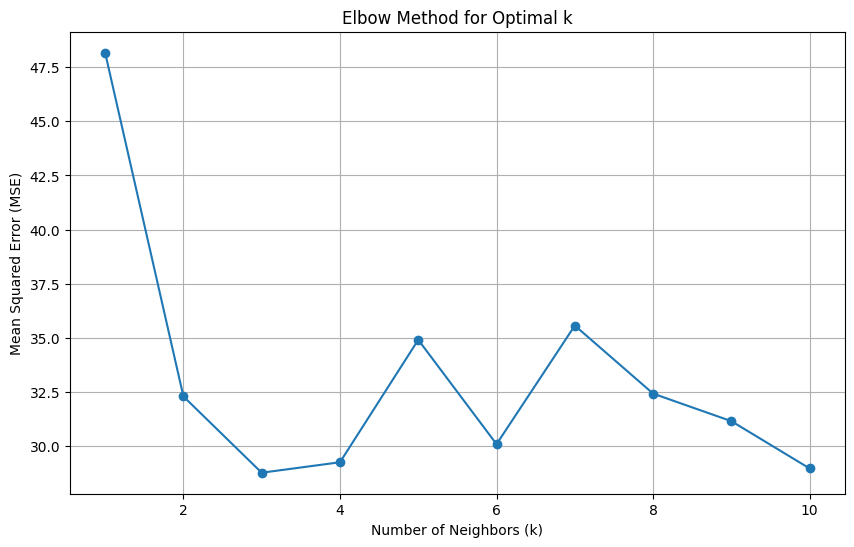

In [49]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [51]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 3


In [52]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [53]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [54]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 14.148643551744607
Testing MSE: 28.760066330570236
Training R2 Score: 0.998430321462477
Testing R2 Score: 0.9973657622581055


<div style="background-color: red; color: white; padding: 10px;">
    <h2>Decision Tree Regressor</h2>
    
</div>

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [56]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [57]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [58]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


#melhor modelo, R2 maior, próximo de 1
#melhor modelo MSE ou RMSE menor.

Training MSE: 3.7013302938841823
Testing MSE: 27.03990528435396
Training R2 Score: 0.99958936708658
Testing R2 Score: 0.9975233179847856



<div style="background-color: red; color: white; padding: 10px;">
    <h2>Random Forest Regressor</h2>
    
</div>

In [60]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(min_samples_leaf=2)

In [62]:
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 4.043247624035201
Testing MSE: 11.282800012544165
Training R2 Score: 0.9995514341007936
Testing R2 Score: 0.998966567834522



<div style="background-color: red; color: white; padding: 10px;">
    <h2>XGB Regressor</h2>
    
</div>

In [65]:
#!pip install xgboost

In [66]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 1.8155374079884985
Testing MSE: 17.17200169581996
Training R2 Score: 0.9997985806842212
Testing R2 Score: 0.9984271547064227



<div style="background-color: blue; color: white; padding: 10px;">
    <h2>Model comparison
</h2>
    
</div>

In [69]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [70]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})


In [71]:
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,8.287219,7.380546,0.999081,0.999324
1,Decision Tree,0.000000,35.038538,1.000000,0.996791
2,Random Forest,2.208693,12.796592,0.999755,0.998828
3,XGBoost,0.000300,23.020840,1.000000,0.997891


In [72]:
#menor MSE e mais próximo de 1 no R2

# Melhor no training XGBoost e Decision Tree	
# melhor no testing Linear Regression 